In [1]:
#download Bayerische Motoren Werke AG price data from Yahoo Finance
import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


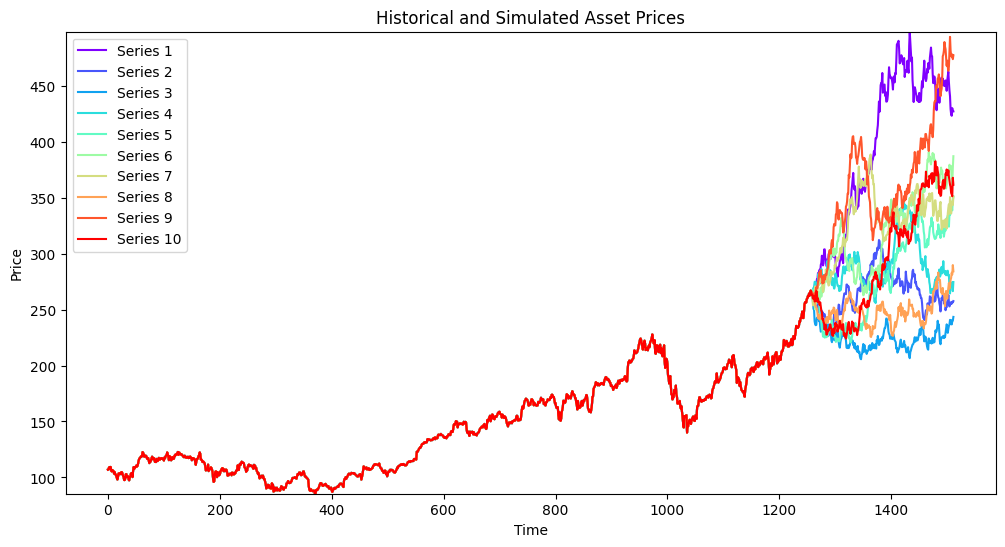

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Visualize(S):
    """
    Visualize multiple time series data.
    Each row of S represents a different series.
    """
    minS = np.min(S)
    maxS = np.max(S)
    noS = S.shape[0]  # Number of series
    cl = plt.cm.rainbow(np.linspace(0, 1, noS))  # Color map

    plt.figure(figsize=(12, 6))
    for i in range(noS):
        plt.plot(S[i, :], color=cl[i], label=f'Series {i+1}')
    plt.ylim([minS, maxS])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Historical and Simulated Asset Prices')
    plt.legend()
    plt.show()

# Read data
AAA = pd.read_csv('AAA.csv', header=0)
dt = 1/252
AAAprices = AAA.iloc[:, 1:4].values.astype(float)  # Extract columns 2, 3, 4

n0 = AAAprices.shape[0]
AAAlogprices = np.log(AAAprices)
AAAlogreturns = AAAlogprices[1:n0, :] - AAAlogprices[0:n0-1, :]

# Estimate drift (v) and covariance matrix (Sigma)
v = np.mean(AAAlogreturns, axis=0) / dt
Sigma = np.cov(AAAlogreturns.T) / dt

def SimMultiGBMexact(S0, v, Sigma, Deltat, T):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    m = int(T / Deltat)  # Number of periods
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    S[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)

    for j in range(1, m + 1):
        S[:, j] = S[:, j - 1] * np.exp(Z[j - 1, :])
    return S

# Simulation parameters
Nsim = 10
T = 1
dt = 1/252
m = int(T / dt)
S0 = AAAprices[-1, :]  # Last observed prices

# Initialize matrices to store simulated paths
S1 = np.zeros((Nsim, m + 1))
S2 = np.zeros((Nsim, m + 1))
S3 = np.zeros((Nsim, m + 1))

#np.random.seed(4518)  # Set seed for reproducibility

# Simulate paths
for i in range(Nsim):
    S = SimMultiGBMexact(S0, v, Sigma, dt, T)
    S1[i, :] = S[0, :]
    S2[i, :] = S[1, :]
    S3[i, :] = S[2, :]

# Combine historical and simulated data for the first asset
HistS1 = np.tile(AAAprices[:, 0], (Nsim, 1))
wholeS1 = np.hstack((HistS1, S1))

# Visualize the paths
Visualize(wholeS1)


In [3]:

start_date = datetime.datetime.strptime('2022-09-30', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-10-27', '%Y-%m-%d')
# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'
MBG_ticker = 'MBG.DE'
P_ticket = 'P911.DE'

# Download historical data for BMW
bmw_data = yf.download(BMW_ticker, start=start_date, end=end_date)
mbg_data = yf.download(MBG_ticker, start=start_date, end=end_date)
p_data = yf.download(P_ticket, start=start_date, end=end_date)
# Display the data
print(bmw_data.head(2))
print(mbg_data.head(2))
print(p_data.head(2))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                        BMW.DE     BMW.DE     BMW.DE     BMW.DE   
Date                                                                    
2022-09-30 00:00:00+00:00  60.740814  69.989998  70.510002  68.779999   
2022-10-03 00:00:00+00:00  61.383026  70.730003  71.139999  68.610001   

Price                           Open   Volume  
Ticker                        BMW.DE   BMW.DE  
Date                                           
2022-09-30 00:00:00+00:00  69.830002  1693045  
2022-10-03 00:00:00+00:00  69.589996  1062248  
Price                      Adj Close      Close       High        Low   Open  \
Ticker                        MBG.DE     MBG.DE     MBG.DE     MBG.DE MBG.DE   
Date                                                                           
2022-09-30 00:00:00+00:00  44.969971  52.349998  53.369999  50.980000  52.68   
2022-10-03 00:00:00+00:00  45.519749  52.990002  53.320000  51.080002  52.

In [4]:
# Check for missing values
print(mbg_data.isnull().sum())
print(bmw_data.isnull().sum())
print(p_data.isnull().sum())

Price      Ticker
Adj Close  MBG.DE    0
Close      MBG.DE    0
High       MBG.DE    0
Low        MBG.DE    0
Open       MBG.DE    0
Volume     MBG.DE    0
dtype: int64
Price      Ticker
Adj Close  BMW.DE    0
Close      BMW.DE    0
High       BMW.DE    0
Low        BMW.DE    0
Open       BMW.DE    0
Volume     BMW.DE    0
dtype: int64
Price      Ticker 
Adj Close  P911.DE    0
Close      P911.DE    0
High       P911.DE    0
Low        P911.DE    0
Open       P911.DE    0
Volume     P911.DE    0
dtype: int64


In [5]:
bmw_data.columns

MultiIndex([('Adj Close', 'BMW.DE'),
            (    'Close', 'BMW.DE'),
            (     'High', 'BMW.DE'),
            (      'Low', 'BMW.DE'),
            (     'Open', 'BMW.DE'),
            (   'Volume', 'BMW.DE')],
           names=['Price', 'Ticker'])

In [6]:

# log the adjusted closing prices and calculate the returns
bmw_data['Log Returns'] = np.log(bmw_data['Adj Close'] / bmw_data['Adj Close'].shift(1))
mbg_data['Log Returns'] = np.log(mbg_data['Adj Close'] / mbg_data['Adj Close'].shift(1))
p_data['Log Returns'] = np.log(p_data['Adj Close'] / p_data['Adj Close'].shift(1))


#create a new dataframe of returns
returns = pd.concat([bmw_data['Log Returns'], mbg_data['Log Returns'], p_data['Log Returns']], axis=1)
returns.columns = ['BMW', 'MBG', 'Porsche']

#remove first row of NaN values
returns = returns.dropna()

#show the first 5 rows of the dataframe
print(returns.head(5))
print(returns.columns)

                                BMW       MBG   Porsche
Date                                                   
2022-10-03 00:00:00+00:00  0.010517  0.012151 -0.008521
2022-10-04 00:00:00+00:00  0.029533  0.037230  0.067133
2022-10-05 00:00:00+00:00 -0.019125 -0.036853  0.005017
2022-10-06 00:00:00+00:00  0.006972  0.015536  0.031351
2022-10-07 00:00:00+00:00 -0.003759 -0.023111  0.015314
Index(['BMW', 'MBG', 'Porsche'], dtype='object')


In [7]:
AAAlogreturns

array([[ 0.00137491,  0.00390953,  0.00630307],
       [ 0.01837557,  0.00290838,  0.00900843],
       [-0.00872043,  0.00319137, -0.00178925],
       ...,
       [ 0.00502946, -0.0103266 ,  0.00746851],
       [-0.00303717, -0.00550823,  0.00014835],
       [-0.01170976, -0.00820826, -0.00415058]])

In [8]:
returns.to_numpy()

array([[ 0.01051749,  0.01215132, -0.00852102],
       [ 0.02953263,  0.03722993,  0.06713289],
       [-0.01912474, -0.03685255,  0.00501711],
       ...,
       [ 0.00450984,  0.0026107 ,  0.00029806],
       [ 0.0121023 ,  0.0143242 ,  0.03023869],
       [-0.00629597, -0.00981497,  0.01606453]])

In [9]:
BMP = pd.concat([bmw_data['Adj Close'], mbg_data['Adj Close'], p_data['Adj Close']], axis=1)

In [10]:
bmp_prices = pd.concat([bmw_data['Close', 'BMW.DE'], mbg_data['Close', 'MBG.DE'], p_data['Close', 'P911.DE']], axis=1)
bmp_prices.columns = ['BMW', 'MBG', 'Porsche']
bmp_prices

,BMW,MBG,Porsche
Date,,,
2022-09-30 00:00:00+00:00,69.989998,52.349998,82.500000
2022-10-03 00:00:00+00:00,70.730003,52.990002,81.800003
2022-10-04 00:00:00+00:00,72.849998,55.000000,87.480003
2022-10-05 00:00:00+00:00,71.470001,53.009998,87.919998
2022-10-06 00:00:00+00:00,71.970001,53.840000,90.720001
...,...,...,...
2024-10-21 00:00:00+00:00,74.879997,57.000000,67.599998
2024-10-22 00:00:00+00:00,75.220001,57.380001,67.080002
2024-10-23 00:00:00+00:00,75.559998,57.529999,67.099998


In [11]:
AAAlogprices

array([[4.67159097, 6.29850799, 5.80072771],
       [4.67296587, 6.30241752, 5.80703078],
       [4.69134144, 6.30532589, 5.8160392 ],
       ...,
       [5.58762314, 7.18526577, 7.46881575],
       [5.58458597, 7.17975754, 7.46896411],
       [5.57287621, 7.17154928, 7.46481353]])

In [12]:
# Read data
#AAA = pd.read_csv('AAA.csv', header=0)
dt = 1/252
bmp_prices = BMP.values.astype(float)  # Extract columns 

n0 = bmp_prices.shape[0]
bmplogprices = np.log(bmp_prices)
bmplogreturns = bmplogprices[1:n0, :] - bmplogprices[0:n0-1, :]
bmplogreturns

array([[ 0.01051749,  0.01215132, -0.00852102],
       [ 0.02953263,  0.03722993,  0.06713289],
       [-0.01912474, -0.03685255,  0.00501711],
       ...,
       [ 0.00450984,  0.0026107 ,  0.00029806],
       [ 0.0121023 ,  0.0143242 ,  0.03023869],
       [-0.00629597, -0.00981497,  0.01606453]])

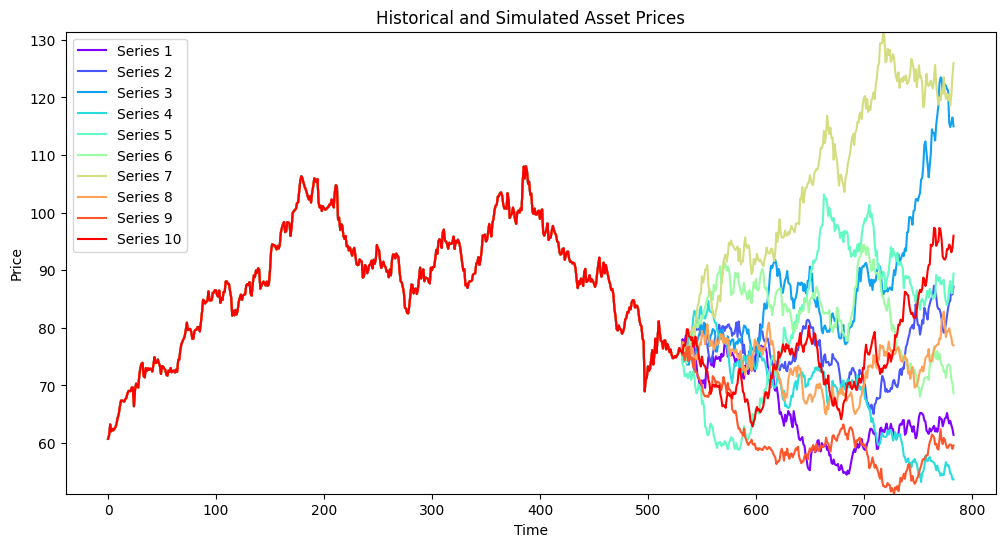

In [13]:


#bmplogreturns = returns.to_numpy()

# Estimate drift (v) and covariance matrix (Sigma)
v = np.mean(bmplogreturns, axis=0) / dt
Sigma = np.cov(bmplogreturns.T) / dt

def SimMultiGBMexact(S0, v, Sigma, Deltat, T):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    m = int(T / Deltat)  # Number of periods
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    S[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)

    for j in range(1, m + 1):
        S[:, j] = S[:, j - 1] * np.exp(Z[j - 1, :])
    return S

# Simulation parameters
Nsim = 10
T = 1
dt = 1/252
m = int(T / dt)
S0 = bmp_prices[-1, :]  # Last observed prices

# Initialize matrices to store simulated paths
S1 = np.zeros((Nsim, m + 1))
S2 = np.zeros((Nsim, m + 1))
S3 = np.zeros((Nsim, m + 1))

np.random.seed(4518)  # Set seed for reproducibility

# Simulate paths
for i in range(Nsim):
    S = SimMultiGBMexact(S0, v, Sigma, dt, T)
    S1[i, :] = S[0, :]
    S2[i, :] = S[1, :]
    S3[i, :] = S[2, :]

# Combine historical and simulated data for the first asset
HistS1 = np.tile(bmp_prices[:, 0], (Nsim, 1))
wholeS1 = np.hstack((HistS1, S1))

# Visualize the paths
Visualize(wholeS1)


In [ ]:
import numpy as np

def calculate_payoff(
    D,
    c,
    T,
    n_total_coupons,
    coupon_frequency,
    S_initial,
    early_redemption_dates,
    S_early_observations,
    S_barrier_levels,
    S_prices_over_time,
    S_final,
    barrier_level_percent,
    conversion_ratio=None
):
    """
    Calculate the payoff of the structured note.

    Parameters:
    - D: float
        Denomination (Principal Amount)
    - c: float
        Annual Coupon Rate (e.g., 0.1025 for 10.25%)
    - T: float
        Total time to maturity in years
    - n_total_coupons: int
        Total number of coupon payments
    - coupon_frequency: int
        Number of coupon payments per year (e.g., 4 for quarterly)
    - S_initial: numpy array
        Initial levels of the Reference Shares
    - early_redemption_dates: list of floats
        Times (in years) of Early Redemption Observation Dates
    - S_early_observations: numpy array
        Prices of Reference Shares at Early Redemption Observation Dates
        Shape: (number of early redemption dates, number of shares)
    - S_barrier_levels: numpy array
        Barrier levels for Reference Shares (as absolute prices)
    - S_prices_over_time: numpy array
        Prices of Reference Shares over time
        Shape: (number of time points, number of shares)
    - S_final: numpy array
        Prices of Reference Shares at maturity
    - barrier_level_percent: float
        Barrier Level as a percentage of Initial Level (e.g., 0.6 for 60%)
    - conversion_ratio: numpy array or None
        Conversion ratios for Reference Shares (optional)
        If None, calculated as D / S_initial

    Returns:
    - payoff: float
        Total payoff received at redemption
    - early_redeemed: bool
        Whether early redemption occurred
    - n_coupons_paid: int
        Number of coupons paid
    """

    # Calculate coupon payment per period
    C = D * (c / coupon_frequency)
    
    # Number of Reference Shares
    N = len(S_initial)
    
    # Determine if early redemption occurs
    early_redeemed = False
    n_coupons_paid = 0
    
    for idx, t_er in enumerate(early_redemption_dates):
        # Prices at the current early redemption observation date
        S_t_er = S_early_observations[idx]
        # Check if all Reference Shares are at or above their Initial Levels
        if np.all(S_t_er >= S_initial):
            early_redeemed = True
            n_coupons_paid = int((t_er * coupon_frequency))
            payoff = D + C * n_coupons_paid
            return payoff, early_redeemed, n_coupons_paid
        else:
            continue
    
    # If no early redemption occurred, proceed to maturity
    n_coupons_paid = n_total_coupons  # All coupons are paid
    
    # Check if any Reference Share has breached the barrier during the lifetime
    barrier_breached = False
    for i in range(N):
        if np.any(S_prices_over_time[:, i] <= S_barrier_levels[i]):
            barrier_breached = True
            break

    # Check if any Reference Share has dropped to zero at maturity
    any_zero_at_maturity = np.any(S_final == 0)
    
    if any_zero_at_maturity:
        # Worst Case Scenario
        payoff = C * n_coupons_paid  # Only coupon payments are received
        early_redeemed = False
        return payoff, early_redeemed, n_coupons_paid
    elif barrier_breached and np.any(S_final < S_initial):
        # Intermediate Case: Barrier breached and at least one share is below its Initial Level
        # Determine the worst-performing Reference Share
        performance = S_final / S_initial
        worst_index = np.argmin(performance)
        worst_share_initial = S_initial[worst_index]
        worst_share_final = S_final[worst_index]
        # Conversion Ratio
        if conversion_ratio is None:
            conversion_ratio = D / worst_share_initial
        # Payoff is the value of the worst-performing share plus coupons
        value_of_shares = conversion_ratio * worst_share_final
        payoff = value_of_shares + C * n_coupons_paid
        early_redeemed = False
        return payoff, early_redeemed, n_coupons_paid
    else:
        # Best Case Scenario
        payoff = D + C * n_coupons_paid  # Full Denomination plus coupons
        early_redeemed = False
        return payoff, early_redeemed, n_coupons_paid


In [ ]:
# Parameters
D = 1000
c = 0.1025
T = 1.25
n_total_coupons = 5
coupon_frequency = 4
S_initial = np.array([100, 100, 100])
barrier_level_percent = 0.60
S_barrier_levels = barrier_level_percent * S_initial  # [60, 60, 60]

# Early Redemption Dates (after 6 months, quarterly)
early_redemption_dates = [0.5, 0.75, 1.0, 1.25]

# Prices at Early Redemption Dates (Assuming no early redemption occurs)
S_early_observations = np.array([
    [95, 98, 97],   # At 0.5 years
    [93, 96, 99],   # At 0.75 years
    [92, 94, 101],  # At 1.0 years
    [90, 95, 102],  # At 1.25 years
])

# Prices Over Time (for barrier breach check)
# For simplicity, assume quarterly observations over T
time_points = np.linspace(0, T, int(T * coupon_frequency) + 1)  # [0, 0.25, 0.5, ..., 1.25]
S_prices_over_time = np.array([
    [100, 100, 100],  # Initial prices
    [97, 99, 98],
    [95, 98, 97],
    [93, 96, 99],
    [92, 94, 101],
    [90, 95, 102],
])

# Final Prices at Maturity
S_final = np.array([90, 50, 110])

# Call the function
payoff, early_redeemed, n_coupons_paid = calculate_payoff(
    D=D,
    c=c,
    T=T,
    n_total_coupons=n_total_coupons,
    coupon_frequency=coupon_frequency,
    S_initial=S_initial,
    early_redemption_dates=early_redemption_dates,
    S_early_observations=S_early_observations,
    S_barrier_levels=S_barrier_levels,
    S_prices_over_time=S_prices_over_time,
    S_final=S_final,
    barrier_level_percent=barrier_level_percent,
    conversion_ratio=None  # Let the function calculate it
)

# Print the results
print(f"Payoff: ${payoff:.2f}")
print(f"Early Redemption Occurred: {early_redeemed}")
print(f"Number of Coupons Paid: {n_coupons_paid}")
